<a href="https://colab.research.google.com/github/Puja2911/Heart-attack-risk-analysis/blob/main/Heart_Attack_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Attack Analysis & Prediction Dataset


https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
import pickle
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix

In [ ]:
path='/content/drive/MyDrive/heart.csv'

In [ ]:
df=pd.read_csv(path)

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.columns


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
df.drop_duplicates(keep='first',inplace=True)


In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df = df.rename(columns={'caa': 'number of major vessels ','thalachh':'MaxHeartRate','trtbps':'RestingBP','cp':'ChestPain'})

In [ ]:
df.columns

Index(['age', 'sex', 'ChestPain', 'RestingBP', 'chol', 'fbs', 'restecg',
       'MaxHeartRate', 'exng', 'oldpeak', 'slp', 'number of major vessels ',
       'thall', 'output'],
      dtype='object')

In [ ]:

df=df.drop(['slp'], axis=1)
df=df.drop(['thall'], axis=1)
df=df.drop(['oldpeak'], axis=1)
df


,age,sex,ChestPain,RestingBP,chol,fbs,restecg,MaxHeartRate,exng,number of major vessels,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,0
299,45,1,3,110,264,0,1,132,0,0,0
300,68,1,0,144,193,1,1,141,0,2,0
301,57,1,0,130,131,0,1,115,1,1,0


In [ ]:
cat_cols = ['sex','exng','number_of_major_vessels','ChestPain','fbs','restecg']
con_cols = ["age","RestingBP","chol","MaxHeartRate"]
target_col = ["output"]

In [ ]:
df.shape

(302, 11)

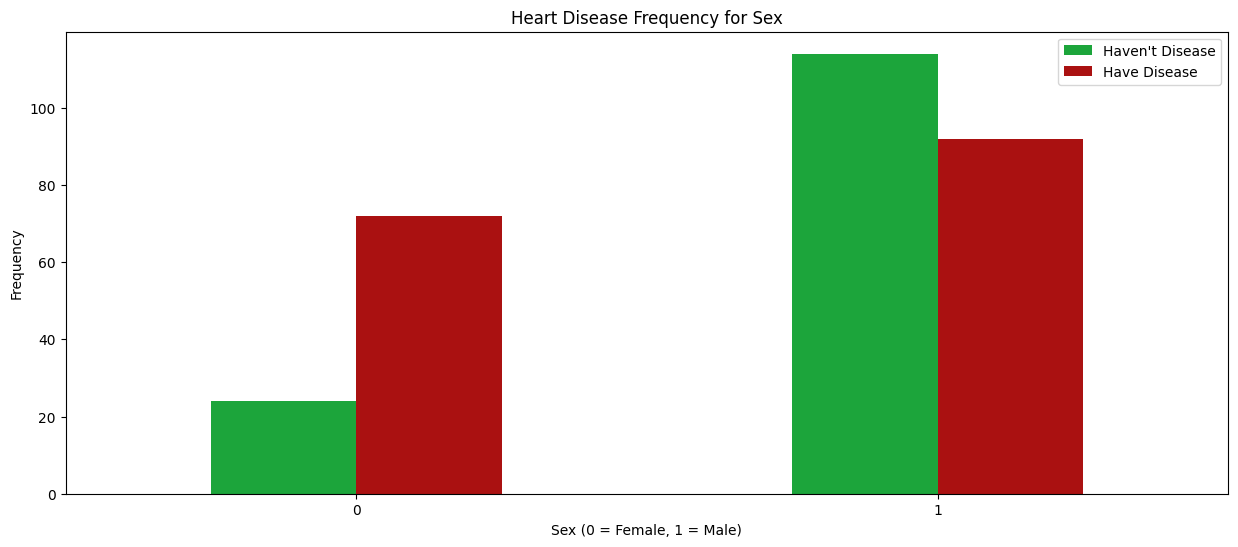

In [ ]:
pd.crosstab(df.sex,df.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

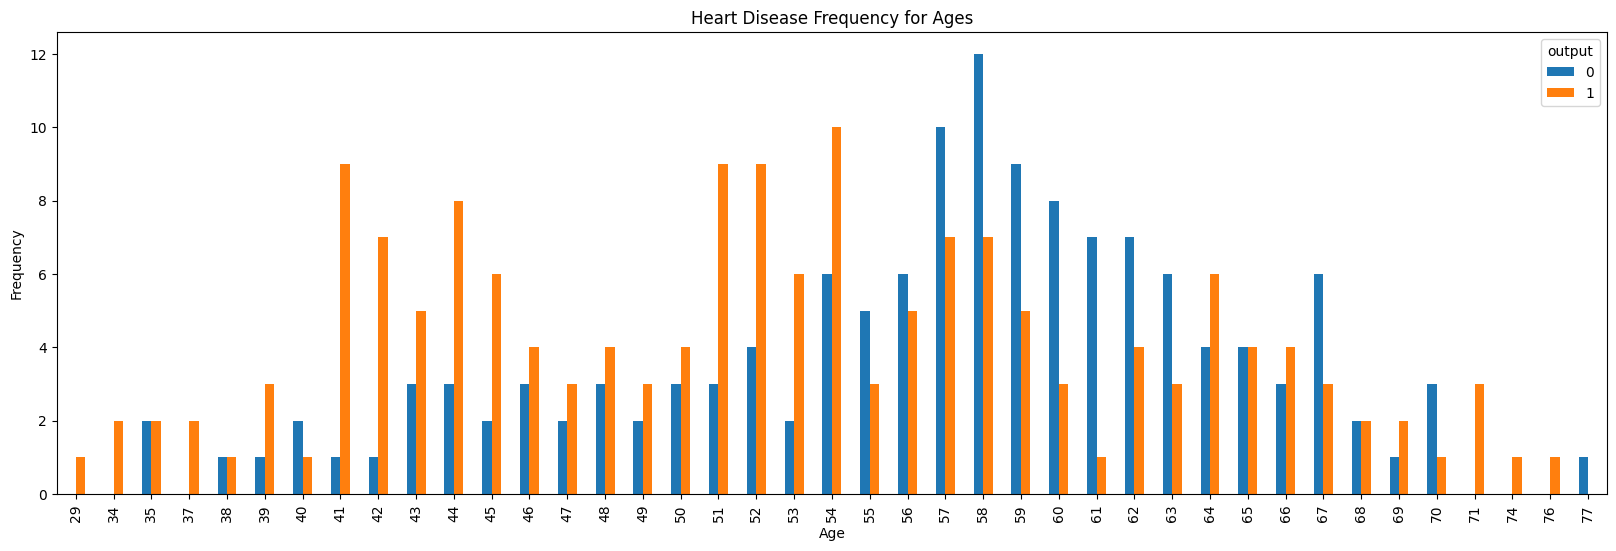

In [ ]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [ ]:
cat_cols

['sex', 'exng', 'number_of_major_vessels', 'ChestPain', 'fbs', 'restecg']

In [ ]:
con_cols

['age', 'RestingBP', 'chol', 'MaxHeartRate']

In [ ]:
datapoints=['age','sex','RestingBP','chol', 'MaxHeartRate','exng','ChestPain','fbs']

In [ ]:

target_col

['output']

In [ ]:
model=LogisticRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[datapoints],df[target_col], test_size=0.2)


In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test, y_test)

0.7704918032786885

In [ ]:
model.predict([[52,130,236,150,0,1,1,0]])

array([0])

In [ ]:
model.predict([[52,140,241,123,0,0,0,0]])

array([0])

In [ ]:
input_data = (52,140,241,123,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not prone to heart attack')
else:
  print('The person is prone to heart attack')

[0]
The person is not prone to heart attack


In [ ]:
import pickle

In [ ]:
filename='trained_model.sav'

In [ ]:
pickle.dump(model,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data = (52,140,241,123,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not prone to heart attack')
else:
  print('The person is prone to heart attack')

[0]
The person is not prone to heart attack
